## ตัวอย่างพื้นฐานของ Pandas

สมุดบันทึกนี้จะพาคุณไปเรียนรู้แนวคิดพื้นฐานของ Pandas บางส่วน เราจะเริ่มต้นด้วยการนำเข้าไลบรารีที่ใช้บ่อยในงานด้านวิทยาศาสตร์ข้อมูล:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ซีรีส์

ซีรีส์คล้ายกับรายการหรืออาเรย์ 1 มิติ แต่มีดัชนี ทุกการดำเนินการจะถูกจัดแนวตามดัชนี


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


หนึ่งในการใช้งานที่พบบ่อยของซีรีส์คือ **ซีรีส์เวลา** ในซีรีส์เวลา ดัชนีจะมีโครงสร้างพิเศษ - โดยทั่วไปจะเป็นช่วงของวันที่หรือเวลาวันที่ เราสามารถสร้างดัชนีดังกล่าวได้ด้วย `pd.date_range`

สมมติว่าเรามีซีรีส์ที่แสดงจำนวนสินค้าที่ซื้อในแต่ละวัน และเรารู้ว่าในทุกวันอาทิตย์เราต้องนำสินค้าหนึ่งชิ้นมาใช้เองด้วย นี่คือตัวอย่างการสร้างโมเดลนั้นโดยใช้ซีรีส์:


Length of index is 366


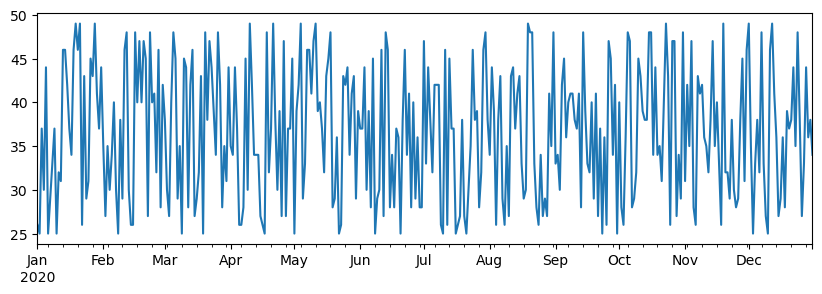

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


ตามที่คุณเห็น เรากำลังมีปัญหาอยู่ที่นี่ เพราะในซีรีส์รายสัปดาห์ วันที่ที่ไม่ได้ระบุจะถือว่าหายไป (`NaN`) และการเพิ่ม `NaN` เข้ากับตัวเลขจะให้ผลลัพธ์เป็น `NaN` เพื่อให้ได้ผลลัพธ์ที่ถูกต้อง เราจำเป็นต้องระบุ `fill_value` เมื่อทำการเพิ่มซีรีส์:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


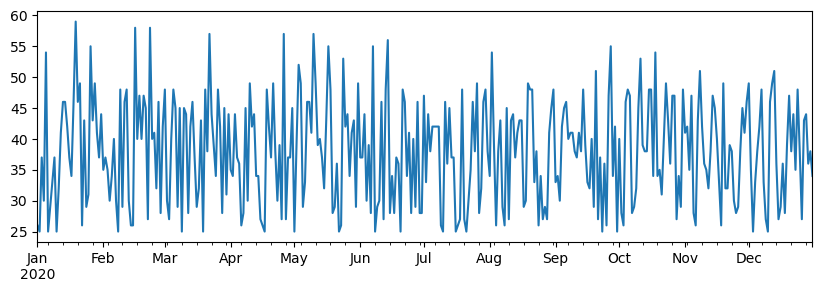

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

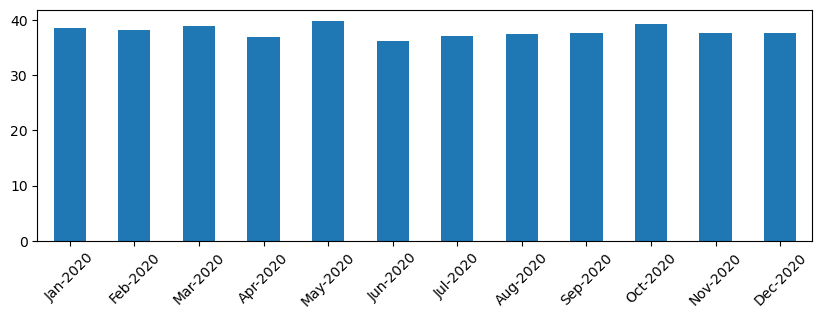

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame คือการรวบรวมชุดข้อมูล (series) หลายชุดที่มีดัชนี (index) เดียวกัน เราสามารถรวมชุดข้อมูลหลายชุดเข้าด้วยกันเพื่อสร้าง DataFrame ได้ โดยให้ `a` และ `b` เป็นชุดข้อมูลที่กำหนดไว้ข้างต้น:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

เรายังสามารถใช้ Series เป็นคอลัมน์ และกำหนดชื่อต่าง ๆ ของคอลัมน์โดยใช้พจนานุกรม:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

สามารถได้ผลลัพธ์เดียวกันโดยการสลับแถวและคอลัมน์ (และเปลี่ยนชื่อคอลัมน์ให้ตรงกับตัวอย่างก่อนหน้า):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

การเลือกคอลัมน์จาก DataFrame สามารถทำได้ดังนี้:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**การเลือกแถว** ตามนิพจน์ตัวกรอง:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

วิธีการทำงานคือ นิพจน์ `df['A']<5` จะคืนค่าซีรีส์แบบบูลีน ซึ่งแสดงว่านิพจน์นั้นเป็น `True` หรือ `False` สำหรับแต่ละองค์ประกอบในซีรีส์ เมื่อใช้ซีรีส์เป็นดัชนี จะคืนค่าชุดย่อยของแถวใน DataFrame ดังนั้นจึงไม่สามารถใช้นิพจน์บูลีนของ Python แบบสุ่มได้ ตัวอย่างเช่น การเขียน `df[df['A']>5 and df['A']<7]` จะไม่ถูกต้อง แต่คุณควรใช้งานพิเศษ `&` บนซีรีส์แบบบูลีน:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**การสร้างคอลัมน์ที่คำนวณได้ใหม่** เราสามารถสร้างคอลัมน์ที่คำนวณได้ใหม่สำหรับ DataFrame ของเราได้อย่างง่ายดายโดยใช้การแสดงออกที่เข้าใจง่าย โค้ดด้านล่างคำนวณการเบี่ยงเบนของ A จากค่าเฉลี่ยของมัน


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

สิ่งที่เกิดขึ้นจริงคือเรากำลังคำนวณซีรีส์ และจากนั้นกำหนดซีรีส์นี้ให้กับด้านซ้ายมือ สร้างคอลัมน์อีกหนึ่งคอลัมน์


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

การเลือกแถวตามตัวเลข สามารถทำได้โดยใช้โครงสร้าง `iloc` ตัวอย่างเช่น การเลือก 5 แถวแรกจาก DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

การจัดกลุ่ม มักใช้เพื่อให้ได้ผลลัพธ์ที่คล้ายกับ *pivot tables* ใน Excel สมมติว่าเราต้องการคำนวณค่าเฉลี่ยของคอลัมน์ `A` สำหรับแต่ละค่าของ `LenB` ที่กำหนด จากนั้นเราสามารถจัดกลุ่ม DataFrame ของเราตาม `LenB` และเรียกใช้ `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

หากเราจำเป็นต้องคำนวณค่าเฉลี่ยและจำนวนขององค์ประกอบในกลุ่ม เราสามารถใช้ฟังก์ชัน `aggregate` ที่ซับซ้อนมากขึ้น:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## การพิมพ์และการสร้างกราฟ

นักวิทยาศาสตร์ข้อมูลมักต้องสำรวจข้อมูล ดังนั้นการสามารถแสดงผลข้อมูลได้จึงเป็นสิ่งสำคัญ เมื่อ DataFrame มีขนาดใหญ่ หลายครั้งเราต้องการเพียงตรวจสอบว่าเรากำลังทำทุกอย่างถูกต้องโดยการพิมพ์แถวแรกๆ ออกมา ซึ่งสามารถทำได้โดยการเรียกใช้ `df.head()` หากคุณใช้งานจาก Jupyter Notebook มันจะแสดง DataFrame ในรูปแบบตารางที่ดูดี


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

เราได้เห็นการใช้งานฟังก์ชัน `plot` เพื่อแสดงภาพข้อมูลในบางคอลัมน์แล้ว แม้ว่าฟังก์ชัน `plot` จะมีประโยชน์มากสำหรับงานหลายประเภท และรองรับกราฟหลากหลายรูปแบบผ่านพารามิเตอร์ `kind=` แต่คุณยังสามารถใช้ไลบรารี `matplotlib` โดยตรงเพื่อสร้างกราฟที่ซับซ้อนมากขึ้นได้ เราจะพูดถึงการแสดงภาพข้อมูลอย่างละเอียดในบทเรียนคอร์สแยกต่างหาก


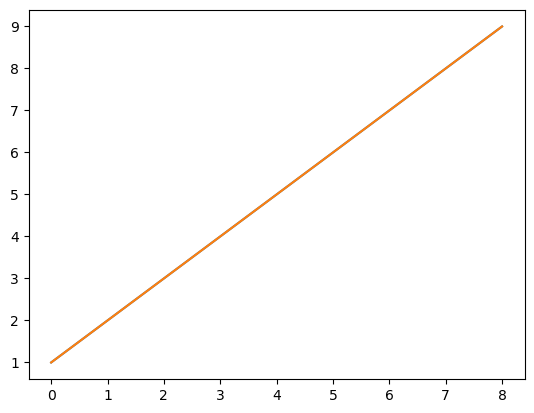

In [61]:
df['A'].plot()
plt.show()

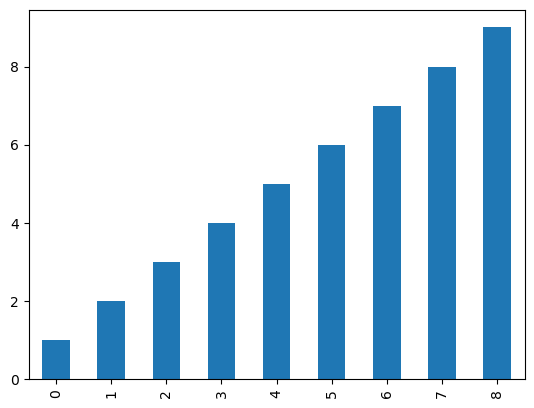

In [63]:
df['A'].plot(kind='bar')
plt.show()

ภาพรวมนี้ครอบคลุมแนวคิดสำคัญส่วนใหญ่ของ Pandas อย่างไรก็ตาม ไลบรารีนี้มีความหลากหลายมาก และไม่มีขีดจำกัดในสิ่งที่คุณสามารถทำได้! ตอนนี้เรามาใช้ความรู้นี้ในการแก้ปัญหาเฉพาะกันเถอะ



---

**ข้อจำกัดความรับผิดชอบ**:  
เอกสารนี้ได้รับการแปลโดยใช้บริการแปลภาษา AI [Co-op Translator](https://github.com/Azure/co-op-translator) แม้ว่าเราจะพยายามอย่างเต็มที่เพื่อความถูกต้อง แต่โปรดทราบว่าการแปลอัตโนมัติอาจมีข้อผิดพลาดหรือความไม่แม่นยำ เอกสารต้นฉบับในภาษาต้นทางควรถือเป็นแหล่งข้อมูลที่เชื่อถือได้ สำหรับข้อมูลที่สำคัญ แนะนำให้ใช้บริการแปลภาษามนุษย์ที่เป็นมืออาชีพ เราไม่รับผิดชอบต่อความเข้าใจผิดหรือการตีความที่ผิดพลาดซึ่งเกิดจากการใช้การแปลนี้
